In [3]:
import math
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_datasets as tfds

from tensorflow import keras
from keras import layers
import numpy as np
import diffusion
from diffusion import DiffusionModel
import unet
from vqvae import VQVAETrainer
from train_vqvae import create_image_dataset

In [4]:
# data
dataset_repetitions = 5
num_epochs = 2000  # train for at least 50 epochs for good results
image_height = 128
image_width = 256
latent_height = 32
latent_width = 64

diffusion_steps = 5
plot_diffusion_steps = 20

# sampling
min_signal_rate = 0.02
max_signal_rate = 0.95

# architecture
embedding_dims = 32
emb_size=32
#num_classes = 12

widths = [32, 64, 96]
block_depth = 2
attention_levels = [0, 1, 0]
latent_dim = 16

# optimization
batch_size = 64
ema = 0.999
learning_rate = 1e-3
weight_decay = 1e-4

In [5]:
img_dset= create_image_dataset("combined_rgb.tfrecord", batch_size=64, buffer_size=640)
scaled_images = np.concatenate(list(img_dset.as_numpy_iterator()), axis=0)
data_variance = np.var(scaled_images)

Metal device set to: Apple M2 Max


2023-08-30 15:11:38.011746: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


In [6]:
vqvae = VQVAETrainer(data_variance, latent_dim=16, num_embeddings=128)
vqvae.vqvae.load_weights("vqvae_weights.h5")



# create and compile the model
model = DiffusionModel(widths,
                       block_depth,
                       attention_levels,
                       vqvae)

model.load_weights("checkpoints/diffusion_model") 


1
2
2
1


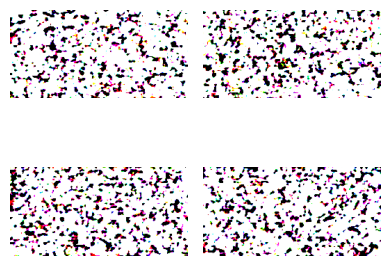

In [7]:
model.display_generate()